In [24]:
import os
import cv2
from tensorflow import keras
import numpy as np

In [25]:
file='tumor dataset'
path=os.listdir(file)
categories=[i for i in range(len(path))]
dictonary={i:j for i,j in enumerate(path)}
path

['no', 'pred', 'yes']

In [3]:
data=[]
labels=[]
for category in categories:
    file_path=os.path.join(file,dictonary[category])
    image_path=os.listdir(file_path)
    for i,j in enumerate(image_path):
        images=os.path.join(file_path,image_path[i])
        grey_img=cv2.cvtColor(cv2.imread(images),cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(grey_img,(100,100))
        data.append(resized)
        labels.append(category)

In [26]:
data=[]
labels=[]
dic={"yes":1,"no":0}
for i in path:
    if i=='pred': continue
    file_path=os.path.join(file,i)
    image_path=os.listdir(file_path)
    for j in image_path:
        images=os.path.join(file_path,j)
        grey_img=cv2.cvtColor(cv2.imread(images),cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(grey_img,(100,100))
        data.append(resized)
        labels.append(dic[i])

In [27]:
data=np.array(data,'float32')/255
data=np.array(data,'float32').reshape(data.shape[0],100,100,1)
labels=keras.utils.to_categorical(labels,2)


In [28]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten,Dropout,MaxPooling2D,Convolution2D,Dense

In [30]:
model=Sequential()
model.add(Convolution2D(200,3,activation='relu',input_shape=data.shape[1:]))
model.add(MaxPooling2D((2,2),2))

model.add(Convolution2D(100,3,activation='relu',input_shape=data.shape[1:]))
model.add(MaxPooling2D((2,2),2))

model.add(Flatten())

model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))
          
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y=train_test_split(data,labels,test_size=0.1,random_state=4)

In [33]:
train_x.shape

(2700, 100, 100, 1)

In [34]:
test_x.shape

(300, 100, 100, 1)

In [35]:
train_y.shape

(2700, 2)

In [36]:
test_y.shape

(300, 2)

In [37]:
hiss=model.fit(train_x,train_y,epochs=20,validation_data=(test_x,test_y))

Epoch 1/20
85/85 [==============================] - 263s 3s/step - loss: 0.4978 - accuracy: 0.7637 - val_loss: 0.3758 - val_accuracy: 0.8467
Epoch 2/20
85/85 [==============================] - 222s 3s/step - loss: 0.3113 - accuracy: 0.8748 - val_loss: 0.2145 - val_accuracy: 0.9267
Epoch 3/20
85/85 [==============================] - 219s 3s/step - loss: 0.1975 - accuracy: 0.9219 - val_loss: 0.1091 - val_accuracy: 0.9500
Epoch 4/20
85/85 [==============================] - 230s 3s/step - loss: 0.1094 - accuracy: 0.9648 - val_loss: 0.0879 - val_accuracy: 0.9733
Epoch 5/20
85/85 [==============================] - 213s 3s/step - loss: 0.0800 - accuracy: 0.9744 - val_loss: 0.0960 - val_accuracy: 0.9700
Epoch 6/20
85/85 [==============================] - 205s 2s/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.0752 - val_accuracy: 0.9733
Epoch 7/20
85/85 [==============================] - 198s 2s/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0974 - val_accuracy: 0.9800
Epoch 8/20
85

In [38]:
fin_json=model.to_json()
with open ('tumor.json','w') as json_file:
    json_file.write(fin_json)
model.save_weights('Tumor.h5')

In [43]:
from tensorflow.keras.models import model_from_json
model=model_from_json(open('tumor.json','r').read())
model.load_weights('Tumor.h5')

In [44]:
test_x.shape

(300, 100, 100, 1)

In [47]:
import matplotlib.pyplot as plt

digit predicted :0


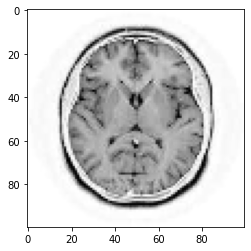

digit predicted :0


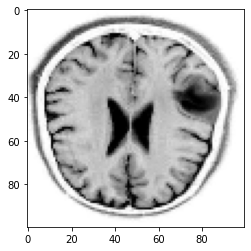

digit predicted :0


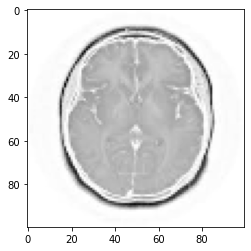

digit predicted :0


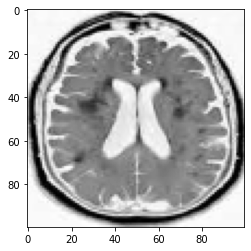

digit predicted :0


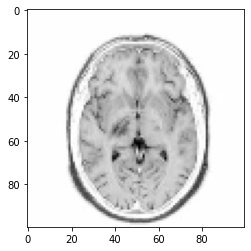

digit predicted :1


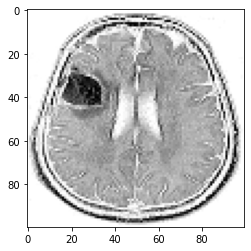

digit predicted :0


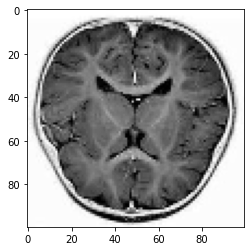

digit predicted :0


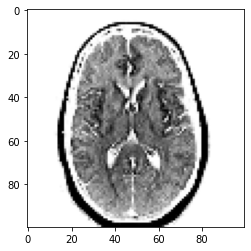

digit predicted :0


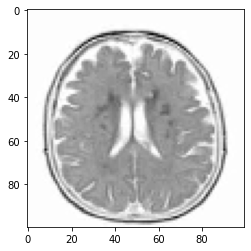

digit predicted :1


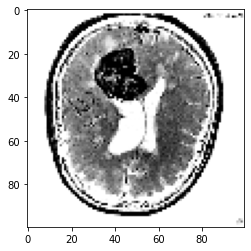

digit predicted :0


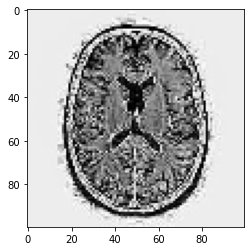

In [48]:
for i in range(200,211):
    sample=test_x[i].reshape(1,100,100,1)
    print(f'digit predicted :{np.argmax(model.predict(sample))}')
    plt.imshow(test_x[i].reshape(100,100),cmap=plt.cm.gray_r)
    plt.show()